

{% include toc title="In This Lesson" icon="file-text" %}



In this data lesson, we explore and visualize stream discharge time series

data collected by the United States Geological Survey (USGS). You will use everything

that you learned in the previous lessons to create your plots. You will use these

plots in the report that you submit for your homework.



Note: this page just shows you what the plots should look like. You will need

to use your programming skills to create the plots!



<div class='notice--success' markdown="1">



## <i class="fa fa-graduation-cap" aria-hidden="true"></i> Learning Objectives



After completing this tutorial, you will be able to:



* Plot USGS Stream Discharge time series data in `R`.



## <i class="fa fa-check-square-o fa-2" aria-hidden="true"></i> What you need



You need `R` and `RStudio` to complete this tutorial. Also you should have

an `earth-analytics` directory setup on your computer with a `/data`

directory with it.



* [How to Setup R / RStudio](/course-materials/earth-analytics/week-1/setup-r-rstudio/)

* [Setup your working directory](/course-materials/earth-analytics/week-1/setup-working-directory/)

* [Intro to the R & RStudio Interface](/course-materials/earth-analytics/week-1/intro-to-r-and-rstudio)



### R Libraries to Install:



* **ggplot2:** `install.packages("ggplot2")`

* **dplyr:** `install.packages("dplyr")`



If you haven't already downloaded this data (from the previous lesson), do so now.



[<i class="fa fa-download" aria-hidden="true"></i> Download Week 2 Data](https://ndownloader.figshare.com/files/7426738){:data-proofer-ignore='' .btn }



</div>



## About the Data - USGS Stream Discharge Data



The USGS has a distributed network of aquatic sensors located in streams across

the United States. This network monitors a suit of variables that are important

to stream morphology and health. One of the metrics that this sensor network

monitors is **Stream Discharge**, a metric which quantifies the volume of water

moving down a stream. Discharge is an ideal metric to quantify flow, which

increases significantly during a flood event.



> As defined by USGS: Discharge is the volume of water moving down a stream or

> river per unit of time, commonly expressed in cubic feet per second or gallons

> per day. In general, river discharge is computed by multiplying the area of

> water in a channel cross section by the average velocity of the water in that

> cross section.

>

> <a href="http://water.usgs.gov/edu/streamflow2.html" target="_blank">

Read more about stream discharge data collected by USGS.</a>



<figure>

<a href="{{ site.url }}/images/course-materials/earth-analytics/week-2/USGS-peak-discharge.gif">

<img src="{{ site.url }}/images/course-materials/earth-analytics/week-2/USGS-peak-discharge.gif" alt="Plot of stream discharge from the USGS boulder creek stream gage"></a>

<figcaption>

The USGS tracks stream discharge through time at locations across the United

States. Note the pattern observed in the plot above. The peak recorded discharge

value in 2013 was significantly larger than what was observed in other years.

Source: <a href="http://nwis.waterdata.usgs.gov/usa/nwis/peak/?site_no=06730200" target="_blank"> USGS, National Water Information System. </a>

</figcaption>

</figure>






In [1]:
# ```{r echo=FALSE}

# knitr::opts_chunk$set(echo = TRUE, message = FALSE, warning=FALSE)



# ```




## Work with USGS Stream Gage Data



Let's begin by loading our libraries and setting our working directory.




In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import earthlab as et
import os
plt.ion()

In [2]:
os.chdir('/Users/choldgraf/earth-analytics/')

In [2]:
# ```{r load-libraries}

# # set your working directory

# # setwd("working-dir-path-here")



# # load packages

# library(ggplot2) # create efficient, professional plots

# library(dplyr) # data manipulation



# # set strings as factors to false

# options(stringsAsFactors = FALSE)

# ```




##  Import USGS Stream Discharge Data Into R



Let's first import our data using the `read.csv()` function.






In [3]:
discharge = pd.read_csv('data/week_02-hw/discharge/06730200-discharge-daily-1986-2013.csv', parse_dates=['datetime'])
discharge.head()

,agency_cd,site_no,datetime,disValue,qualCode
0,USGS,6730200,1986-10-01,30.0,A
1,USGS,6730200,1986-10-02,30.0,A
2,USGS,6730200,1986-10-03,30.0,A
3,USGS,6730200,1986-10-04,30.0,A
4,USGS,6730200,1986-10-05,30.0,A


In [1]:
# ```{r import-discharge-2 }

# discharge <- read.csv("data/week2/discharge/06730200-discharge-daily-1986-2013.csv",

#                       header=TRUE)



# # view first 6 lines of data

# head(discharge)



# ```






<div class="notice--warning" markdown="1">



## <i class="fa fa-pencil-square-o" aria-hidden="true"></i> Challenge



Now that the data are imported, plot disValue (discharge value) over time.

To do this, you will need to use

everything that you learned in the previous lessons.



Hint: when converting the date, take a close look at the format of the date -

is the year 4 digits (including the century) or just 2? Use `?strptime` to figure

out what format elements you'll need to include to get the date right.



</div>






In [4]:
discharge['datetime'] = pd.to_datetime(discharge['datetime'])

In [5]:
# ```{r convert-time, echo=F }

# # convert to date class -

# discharge$datetime <- as.Date(discharge$datetime, format="%m/%d/%y")



# # looks like there aren't any no data values to deal with.

# ```






Your plot should look something like the one below:




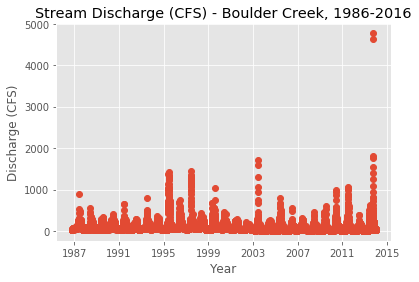

In [6]:
fig, ax = plt.subplots()
ax.plot('datetime', 'disValue', 'o', data=discharge)
ax.set(title="Stream Discharge (CFS) - Boulder Creek, 1986-2016",
       xlabel="Year", ylabel="Discharge (CFS)");

In [7]:
# ```{r plot-flood-data, echo=F, fig.cap="plot of discharge vs time" }

# # check out our date range

# stream_discharge_30yrs  <- ggplot(discharge, aes(datetime, disValue)) +

#               geom_point() +

#               ggtitle("Stream Discharge (CFS) - Boulder Creek, 1986-2016") +

#               xlab("Year") + ylab("Discharge (CFS)")



# stream_discharge_30yrs



# ```




<div class="notice--warning" markdown="1">



## <i class="fa fa-pencil-square-o" aria-hidden="true"></i> Challenge



Similar to the previous lesson, take the cleaned discharge data that you just

plotted and subset it to the time span

of 2013-08-15 to 2013-10-15. Use `dplyr` pipes and the `filter()` function

to perform the subset.



Plot the data with `ggplot()`. Your plot should look like the one below.

</div>






In [8]:
# Pandas is giving a weird error when using query so we can just use regular bools
discharge_augSept_2013 = discharge[(discharge['datetime'] >= "2013-08-015") & (discharge['datetime'] <= "2013-10-015")]

In [9]:
# ```{r define-time-subset, echo=F}

# discharge_augSept_2013 <- discharge %>%

#                   filter((datetime >= as.Date('2013-08-15') & datetime <= as.Date('2013-10-15')))



# ```


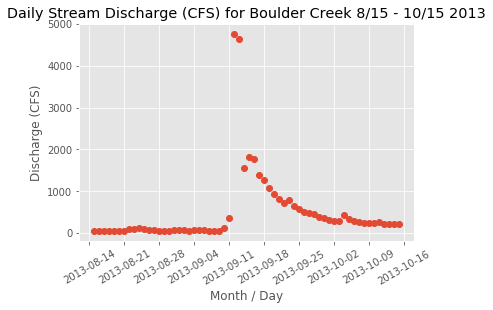

In [10]:
fig, ax = plt.subplots()
ax.plot('datetime', 'disValue', 'o', data=discharge_augSept_2013)
ax.set(title="Daily Stream Discharge (CFS) for Boulder Creek 8/15 - 10/15 2013",
       xlabel="Month / Day", ylabel="Discharge (CFS)")
plt.setp(ax.get_xticklabels(), rotation=30);

In [11]:
# ```{r plot-challenge, echo=F, fig.cap="ggplot subsetted discharge data"}

# # plot the data - Aug 15-October 15

# stream.discharge_3mo <- ggplot(discharge_augSept_2013,

#           aes(datetime, disValue)) +

#           geom_point() +

#           xlab("Month / Day") + ylab("Discharge (Cubic Feet per Second)") +

#           ggtitle("Daily Stream Discharge (CFS) for Boulder Creek 8/15 - 10/15 2013")



# stream.discharge_3mo

# ```
